In [1]:
import math
import unidecode

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)

In [2]:
def descriptive(series):
    counts = series.value_counts()
    print(counts.head(10))
    rows_common = counts[counts >= 5].sum()
    classes_common = counts[counts >= 5].count()
    print("not null", series.notnull().sum())
    print("rows (common classes)", rows_common, "classes", classes_common)
    print(counts.describe(percentiles=[0.9, 0.95, 0.99, 0.999]))

In [3]:
df_train = pd.read_csv("/kaggle/input/foursquare-location-matching/train_fold.csv")
print(df_train.shape)
print(df_train.isnull().sum(axis=0))
df_train.head()

(1138812, 15)
id                        0
name                      1
latitude                  0
longitude                 0
address              396621
city                 299189
state                420586
zip                  595426
country                  11
url                  871088
phone                795957
categories            98307
point_of_interest         0
validation                0
fold                      0
dtype: int64


,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories,point_of_interest,validation,fold
0,E_000001272c6c5d,Café Stad Oudenaarde,50.859975,3.634196,Abdijstraat,Nederename,Oost-Vlaanderen,9700,BE,NaN,NaN,Bars,P_677e840bb6fc7e,0,1
1,E_000002eae2a589,Carioca Manero,-22.907225,-43.178244,NaN,NaN,NaN,NaN,BR,NaN,NaN,Brazilian Restaurants,P_d82910d8382a83,0,1
2,E_000007f24ebc95,ร้านตัดผมการาเกด,13.780813,100.484900,NaN,NaN,NaN,NaN,TH,NaN,NaN,Salons / Barbershops,P_b1066599e78477,0,2
3,E_000008a8ba4f48,Turkcell,37.844510,27.844202,Adnan Menderes Bulvarı,NaN,NaN,NaN,TR,NaN,NaN,Mobile Phone Shops,P_b2ed86905a4cd3,0,1
4,E_00001d92066153,Restaurante Casa Cofiño,43.338196,-4.326821,NaN,Caviedes,Cantabria,NaN,ES,NaN,NaN,Spanish Restaurants,P_809a884d4407fb,0,3


In [4]:
df_train["validation"].value_counts()

0    1107754
1      31058
Name: validation, dtype: int64

In [5]:
df_train["fold"].value_counts()

 2    369874
 3    369140
 1    368740
-1     31058
Name: fold, dtype: int64

In [6]:
df_train["id"].nunique()

1138812

## Column descriptive analysis

### name

In [7]:
descriptive(df_train["name"])

Starbucks             5637
McDonald's            3370
Redbox                3190
Subway                2024
Payless ShoeSource    1950
7-Eleven              1911
KFC                   1720
Burger King           1468
Shell                 1296
Pizza Hut             1032
Name: name, dtype: int64
not null 1138811
rows (common classes) 198992 classes 9761
count    842086.000000
mean          1.352369
std          10.421648
min           1.000000
50%           1.000000
90%           2.000000
95%           2.000000
99%           5.000000
99.9%        38.000000
max        5637.000000
Name: name, dtype: float64


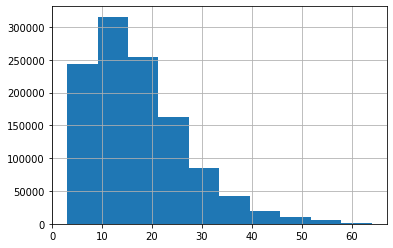

In [8]:
df_train["name"].dropna().apply(len).hist();

## point_of_interest

In [9]:
descriptive(df_train["point_of_interest"])

P_fb339198a31db3    332
P_3a3fbd26e16269    199
P_f70a0977377171    166
P_9290e406eb58ac    145
P_fbe61733fcdebe    132
P_59cb47cbf3a432    130
P_f82d146eaf21da    120
P_40323f7f948c18    120
P_f8a0cd160eec80    119
P_6c385e5fd3a4b7    119
Name: point_of_interest, dtype: int64
not null 1138812
rows (common classes) 61990 classes 7087
count    739972.000000
mean          1.538993
std           1.318908
min           1.000000
50%           1.000000
90%           2.000000
95%           3.000000
99%           4.000000
99.9%        14.000000
max         332.000000
Name: point_of_interest, dtype: float64


Possible pairs per POI

In [10]:
poi_df = df_train.groupby(["point_of_interest"])["id"] \
    .apply(set).reset_index()
poi_df["n"] = poi_df["id"].apply(len)
poi_df = poi_df[poi_df["n"] > 1]
poi_df["max_pairs"] = poi_df["n"].apply(lambda x: math.comb(x, 2))
print(poi_df.shape)
poi_df.head()

(314948, 4)


,point_of_interest,id,n,max_pairs
1,P_00001c309a5e0a,"{E_c1f62f2aa41ff6, E_3b8a876a004093, E_a66af820515384, E_7b12ba037d7af8}",4,6
3,P_0000561fe92bed,"{E_2f12c350e37a69, E_e14714f4aa6461}",2,1
4,P_0000bccb92573c,"{E_822bc2df39ec06, E_408896b60c7893}",2,1
5,P_0000c58a53df6d,"{E_4531a43f702c7a, E_93790f039b7089}",2,1
7,P_00010455487fcf,"{E_1078508889ada9, E_053941f0d8a50c}",2,1


In [11]:
poi_df["max_pairs"].sum()

950503

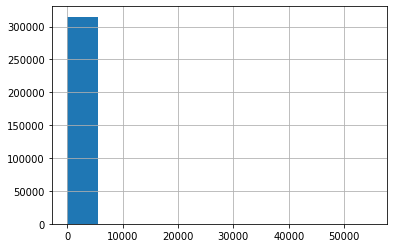

In [12]:
poi_df["max_pairs"].hist();

## latitude, longitude

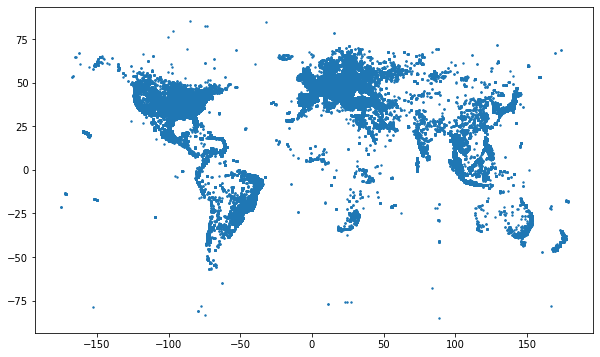

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(
    x=df_train["longitude"], 
    y=df_train["latitude"],
    s=2);

same latitude, longitude and different POI

In [14]:
df_loc = df_train.groupby(["longitude", "latitude"])["point_of_interest"].apply(set)
df_loc = df_loc.reset_index()
df_loc["n"] = df_loc["point_of_interest"].apply(len)
df_loc = df_loc[df_loc["n"] > 1]
df_loc

,longitude,latitude,point_of_interest,n
333,-157.963325,21.355226,"{P_97eeae5a7d6afd, P_41b2748302676a}",2
630,-157.860387,21.318409,"{P_d80f2adb28e6c7, P_465f467f64099a}",2
632,-157.860383,21.318455,"{P_cdf5ae6d3d291a, P_6d461c1dbac3a3}",2
633,-157.860376,21.318417,"{P_818b183769a2bb, P_d4350340341c63, P_1e9fc50352ef2b}",3
2028,-149.830188,61.203790,"{P_ecf510ef0e66df, P_270d2157e9ff52, P_55e37550f977e0}",3
...,...,...,...,...
1126115,152.384583,-24.857884,"{P_4887b9082a3dcc, P_a386bc078d8b44, P_e5fec0ebaed869, P_b8ba7b49ce6e34}",4
1126116,152.384585,-24.857886,"{P_4887b9082a3dcc, P_a386bc078d8b44, P_e5fec0ebaed869, P_b8ba7b49ce6e34}",4
1126470,153.023449,-27.471011,"{P_f995fddd9344c9, P_0c5f9204dcc58c}",2
1127226,153.380412,-27.978115,"{P_0874cfd8259735, P_49a2d496a9cfc7}",2


In [15]:
df_loc["n"].sum()

4481

## address

In [16]:
descriptive(df_train["address"])

Terminal 1              261
日本                      221
Siam Paragon            174
Terminal 2              169
丸の内1-9-1                159
Terminal 3              137
Sunway Pyramid          134
The Mall Bangkapi       121
Shopping Iguatemi       120
CentralPlaza Pinklao    116
Name: address, dtype: int64
not null 742191
rows (common classes) 85629 classes 8459
count    558154.000000
mean          1.329724
std           1.765149
min           1.000000
50%           1.000000
90%           2.000000
95%           2.000000
99%           6.000000
99.9%        22.000000
max         261.000000
Name: address, dtype: float64


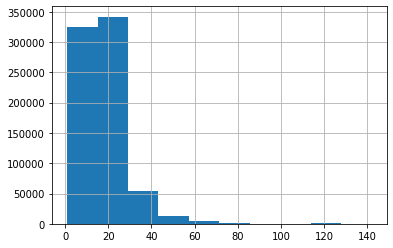

In [17]:
df_train["address"].dropna().apply(len).hist();

## city

In [18]:
descriptive(df_train["city"])

Singapore          10259
Москва              9643
Bandung             8745
New York            8666
İstanbul            6455
Санкт-Петербург     6255
Kuala Lumpur        5436
São Paulo           5249
Ankara              3889
Surabaya            3844
Name: city, dtype: int64
not null 839623
rows (common classes) 757039 classes 15496
count    68105.000000
mean        12.328361
std        116.229930
min          1.000000
50%          2.000000
90%         14.000000
95%         33.000000
99%        171.000000
99.9%     1290.896000
max      10259.000000
Name: city, dtype: float64


## state

In [19]:
descriptive(df_train["state"])

CA          28863
NY          21771
FL          17204
TX          17001
東京都         15868
Bangkok     11784
PA          10501
IL           9868
MI           8073
Selangor     7837
Name: state, dtype: int64
not null 718226
rows (common classes) 698735 classes 4547
count    17596.000000
mean        40.817572
std        464.868046
min          1.000000
50%          1.000000
90%         24.000000
95%         72.000000
99%        632.050000
99.9%     6134.225000
max      28863.000000
Name: state, dtype: float64


## zip

In [20]:
descriptive(df_train["zip"])

9000     1885
10330    1417
10110    1235
10400    1184
2000     1181
1000     1005
3000      903
11000     876
10900     840
6000      761
Name: zip, dtype: int64
not null 543386
rows (common classes) 427542 classes 19864
count    93329.000000
mean         5.822263
std         21.354335
min          1.000000
50%          2.000000
90%         12.000000
95%         24.000000
99%         64.000000
99.9%      248.000000
max       1885.000000
Name: zip, dtype: float64


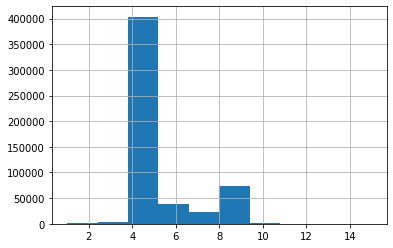

In [21]:
df_train["zip"].dropna().apply(len).hist();

## country

In [22]:
descriptive(df_train["country"])

US    245284
TR    115177
ID    110796
JP     70032
TH     58808
RU     57030
BR     51241
MY     46326
BE     25821
GB     25544
Name: country, dtype: int64
not null 1138801
rows (common classes) 1138730 classes 190
count       221.000000
mean       5152.945701
std       21442.432855
min           1.000000
50%         113.000000
90%        7788.000000
95%       21396.000000
99%      102643.200000
99.9%    216660.460000
max      245284.000000
Name: country, dtype: float64


## url

In [23]:
descriptive(df_train["url"])

https://www.sej.co.jp           921
http://www.7eleven.co.th        833
http://www.payless.com/         687
https://www.dunkindonuts.com    643
https://www.family.co.jp        611
http://www.redbox.com           601
http://www.sberbank.ru          587
http://www.starbucks.com/       444
http://www.isbank.com.tr        427
https://www.kroger.com          377
Name: url, dtype: int64
not null 267724
rows (common classes) 77028 classes 4086
count    171222.000000
mean          1.563607
std           6.929624
min           1.000000
50%           1.000000
90%           2.000000
95%           2.000000
99%          10.000000
99.9%        69.000000
max         921.000000
Name: url, dtype: float64


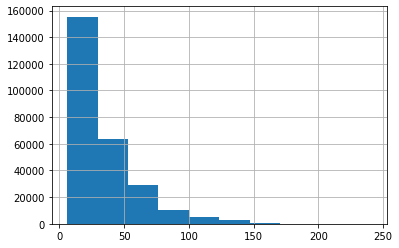

In [24]:
df_train["url"].dropna().apply(len).hist();

## phone

In [25]:
descriptive(df_train["phone"])

8667332693        1875
+18667332693      1010
+18002758777       559
+498002000015      365
+4922120199959     363
820820001          313
+3270220200        263
+864008206998      219
+33149461720       195
+78003330303       193
Name: phone, dtype: int64
not null 342855
rows (common classes) 18943 classes 972
count    293454.000000
mean          1.168343
std           4.478935
min           1.000000
50%           1.000000
90%           2.000000
95%           2.000000
99%           2.000000
99.9%        12.000000
max        1875.000000
Name: phone, dtype: float64


<AxesSubplot:>

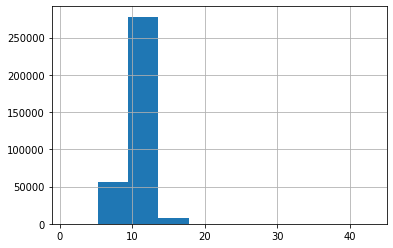

In [26]:
df_train["phone"].dropna().apply(len).hist()

## categories

In [27]:
descriptive(df_train["categories"].str.lower())

residential buildings (apartments / condos)    25481
banks                                          21494
college classrooms                             21438
cafés                                          17805
coffee shops                                   17097
offices                                        16954
hotels                                         16583
convenience stores                             13530
buildings                                      11981
salons / barbershops                           11922
Name: categories, dtype: int64
not null 1040505
rows (common classes) 978473 classes 6407
count    52578.000000
mean        19.789741
std        327.974023
min          1.000000
50%          1.000000
90%          6.000000
95%         14.000000
99%        187.000000
99.9%     3799.998000
max      25481.000000
Name: categories, dtype: float64


## Examples

In [28]:
pois = df_train["point_of_interest"].value_counts()
pois = pois[pois > 1].index.values
np.random.shuffle(pois)

In [29]:
df_train[df_train["point_of_interest"] == pois[0]]

,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories,point_of_interest,validation,fold
293192,E_41d662cfafeacd,Gym at the Standard,39.295624,-76.613638,501 Saint Paul St,Baltimore,MD,21202,US,NaN,NaN,"Gyms or Fitness Centers, Gyms",P_cecade7c3b7b24,0,2
901373,E_ca7775572899c1,The Standard Fitness Center,39.295230,-76.613922,501 Saint Paul St,Baltimore,MD,21202,US,NaN,NaN,Gyms,P_cecade7c3b7b24,0,2


In [30]:
df_train[df_train["point_of_interest"] == pois[1]]

,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories,point_of_interest,validation,fold
589195,E_846ec287a8c04a,KFC,36.144176,-80.299120,2817 Reynolda Rd,Winston Salem,NC,27106,US,https://locations.kfc.com/nc/winston-salem/2817-reynolda-rd,3367770531,"Fried Chicken Joints, Fast Food Restaurants, Restaurants",P_18b3a1ceb19a08,0,3
868418,E_c312b70c268e3c,KFC,36.144181,-80.299085,2817 Reynolda Rd,Winston Salem,NC,27106,US,https://www.kfc.com/store-locator?query=27106,+13367770531,"Fried Chicken Joints, Fast Food Restaurants, Restaurants",P_18b3a1ceb19a08,0,3


In [31]:
df_train[df_train["point_of_interest"] == pois[2]]

,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories,point_of_interest,validation,fold
136774,E_1ea61231bf6ff3,Паром,45.341518,36.673542,NaN,NaN,NaN,NaN,RU,NaN,NaN,Boats or Ferries,P_418fe7e8bf7e5f,0,1
634768,E_8eb7d12cc889b6,"""Паром \""Гликофилоза\""""",45.363846,36.626601,NaN,Керчь,NaN,NaN,UA,NaN,NaN,Boats or Ferries,P_418fe7e8bf7e5f,0,1
734645,E_a509fe0f85dbd9,Паром «Glykofilousa III»,45.341374,36.672875,Керченский пролив,Керчь,NaN,NaN,RU,NaN,NaN,Boats or Ferries,P_418fe7e8bf7e5f,0,1


In [32]:
df_train[df_train["point_of_interest"] == pois[3]]

,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories,point_of_interest,validation,fold
10989,E_02809c2404a840,W Austin,30.265607,-97.746569,200 Lavaca St,Austin,TX,78701,US,https://www.marriott.com/hotels/travel/auswh-w-austin/?y_source=1_MTUwMjg0My00NDAtbG9jYXRpb24ud2Vic2l0ZQ==,5125423600,"Hotels, Resorts, Event Spaces",P_8351fe64a176c7,0,2
66195,E_0ed3298d06f0bb,W hotel austin hotel,30.324223,-97.705928,NaN,Austin,TX,78752,US,NaN,NaN,Hotels,P_8351fe64a176c7,0,2
198321,E_2c8085918241de,"""The \""W\""""",30.434167,-97.768499,NaN,Austin,TX,78757,US,NaN,NaN,NaN,P_8351fe64a176c7,0,2


In [33]:
df_train[df_train["point_of_interest"] == pois[4]]

,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories,point_of_interest,validation,fold
43335,E_09b21a2de92ed4,Super China Buffet,40.045019,-85.995898,17673 Cumberland Rd,Noblesville,IN,46060,US,NaN,3177761335,Chinese Restaurants,P_ce0ac8001ebde6,1,-1
569749,E_8010ac9ab0ef22,Super China Buffet,39.899941,-86.111849,NaN,Noblesville,IN,46060,US,NaN,NaN,Chinese Restaurants,P_ce0ac8001ebde6,1,-1


In [34]:
df_train[df_train["point_of_interest"] == pois[5]]

,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories,point_of_interest,validation,fold
163085,E_248ea83b81fda7,Jai Ｔhai PALACE / ジャイタイ パレス 恵比寿店,35.642650,139.712877,恵比寿4-20-4,渋谷区,東京都,153-0013,JP,NaN,0357935100,Thai Restaurants,P_d8cf3fb9c6554b,0,3
646950,E_9166b7e9bdee5d,ジャイタイ パレス（Jai Ｔhai PALACE） 恵比寿ガーデンプレイス,35.642597,139.712920,NaN,NaN,NaN,NaN,JP,NaN,357935100,Thai Restaurants,P_d8cf3fb9c6554b,0,3


In [35]:
df_train[df_train["point_of_interest"] == pois[6]]

,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories,point_of_interest,validation,fold
86230,E_135055a8cd6879,The Clarendon Guesthouse Bantry Bay (South Africa),-33.927752,18.379306,158 Kloof Road,Bantry Bay (South Africa),NaN,NaN,ZA,NaN,NaN,Hotels,P_66bab9a2818af5,0,2
401279,E_5a2942a8340d46,The Clarendon Bantry Bay,-33.924392,18.383675,NaN,NaN,NaN,NaN,ZA,NaN,NaN,Hotels,P_66bab9a2818af5,0,2


In [36]:
df_train[df_train["point_of_interest"] == pois[7]]

,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories,point_of_interest,validation,fold
495476,E_6f5f154abd7efc,八大处,39.955826,116.177181,NaN,NaN,NaN,NaN,CN,NaN,NaN,NaN,P_b4afd7c0a8fa60,0,2
564098,E_7ec6d95f320766,八大处公园 Badachu Park,39.954315,116.178018,3 Badachu Rd,Beijing,Beijing,NaN,CN,NaN,1088964661,Parks,P_b4afd7c0a8fa60,0,2


In [37]:
df_train[df_train["point_of_interest"] == pois[8]]

,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories,point_of_interest,validation,fold
424891,E_5f7847ffc70bd1,U.S. Bank Branch,36.040152,-115.089774,8050 S Rainbow Blvd,Las Vegas,NV,89139,US,https://locations.usbank.com/index/nevada/las-vegas/south-rainbow-smiths-branch.html,7022631964,Banks,P_2c34910dd24f1d,0,1
797882,E_b3344e2082e275,U.S. Bank,36.042274,-115.241859,8050 S Rainbow Blvd,Las Vegas,NV,89139,US,http://https://www.usbank.com/locations,+17022631964,Banks,P_2c34910dd24f1d,0,1


In [38]:
df_train[df_train["point_of_interest"] == pois[9]]

,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories,point_of_interest,validation,fold
241304,E_362b3502213ac2,im at ubud village cluster denpasar,31.947762,35.872548,NaN,NaN,NaN,NaN,JO,NaN,NaN,NaN,P_7d4714713bc768,0,1
332481,E_4abc24aecd0319,at ubud village cluster denpasar,31.947761,35.872512,NaN,NaN,NaN,NaN,JO,NaN,NaN,NaN,P_7d4714713bc768,0,1


In [39]:
df_train[df_train["point_of_interest"] == pois[10]]

,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories,point_of_interest,validation,fold
592771,E_853aedbadf4b3b,Ak Parti Mudanya İlçe Başkanlığı,40.372164,28.889042,NaN,NaN,NaN,NaN,TR,NaN,NaN,Non-Profits,P_22a44ec669df87,0,2
761297,E_ab05d236bd66a1,Akparti Mudanya İlçe Binası,40.372191,28.889168,NaN,NaN,NaN,NaN,TR,NaN,NaN,Campaign Offices,P_22a44ec669df87,0,2
